In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %matplotlib qt

sns.set_style("whitegrid")
sns.set_style("ticks")
from datetime import datetime
str(datetime.now())




'2018-10-24 18:30:54.035340'

In [47]:
Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')
Cl = Cl[Cl.QC_TYPE=='routine field sample']

In [48]:
eastern_basin = ['ER15M', 'ER09', 'ER63', 'ER10']
central_basin = ['ER78M', 'ER38', 'ER37', 'ER42', 'ER30', 'ER73', 'ER36', 'ER32', 'ER43','ER31']
western_basin = ['ER58', 'ER59', 'ER61', 'ER60', 'ER92', 'ER91M']

In [49]:
def basin(x):
    if x in western_basin:
       return 'Western Basin'
    if x in central_basin:
       return 'Central Basin'
    if x in eastern_basin:
       return 'Eastern Basin'
    else:
       return 'Unknown'

In [50]:
years = range(2003,2018)
seasons = ['Spring', 'Summer']
# Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')
# Cl = Cl[Cl.QC_TYPE=='routine field sample']
# Cl = Cl[Cl['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
# Cl = Cl[Cl['SEASON'].isin(seasons)]
# Cl['VALUE_1'] = pd.to_numeric(Cl['VALUE_1'], errors='coerce')
# Cl['BASIN'] =Cl['STATION_ID'].map(basin)
# Cl = Cl[Cl['VALUE_1']>8]
# Cl = Cl.drop(Cl[(Cl.YEAR==2011) & (Cl.STATION_ID=='ER15M') & (Cl.SEASON=='Spring')].index)

In [51]:
# Clr = Cl.groupby(['STATION_ID','YEAR','SEASON']).mean()['VALUE_1'].reset_index()

In [52]:
Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')
Cl = Cl[Cl.QC_TYPE=='routine field sample']
Cl = Cl[Cl['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
Cl = Cl[Cl['SEASON'].isin(seasons)]
Cl['VALUE_1'] = pd.to_numeric(Cl['VALUE_1'], errors='coerce')
Cl['BASIN'] =Cl['STATION_ID'].map(basin)
Cl = Cl[Cl['YEAR'].isin(years)]
Cl = Cl[Cl['VALUE_1']>8]
Cl['Cl_conc'] = Cl['VALUE_1']

In [55]:
Conductivity = pd.read_csv('../../measurements/GLNPO/Mass Balance/Conductivity.csv')
Conductivity = Conductivity[Conductivity.QC_TYPE=='routine field sample']
Conductivity = Conductivity[Conductivity['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
Conductivity = Conductivity[Conductivity['SEASON'].isin(seasons)]
Conductivity['VALUE_1'] = pd.to_numeric(Conductivity['VALUE_1'], errors='coerce')
Conductivity['BASIN'] =Conductivity['STATION_ID'].map(basin)
Conductivity = Conductivity[Conductivity['YEAR'].isin(years)]
Conductivity['Conductivity_conc'] = Conductivity['VALUE_1']

In [8]:
names = ['Alk', 'Chla', 'Cl', 'Conductivity', 'Hardness', 'NH3N', 'Ntot_oxidized', 'orthoP', 'Oxygen', 'pH', 'Ratios', 'SilicaDissAsSi', 'SiTotal', 'Temp', 'TOTP', 'Turbidity']


No handles with labels found to put in legend.


NH3N


No handles with labels found to put in legend.


SiTotal


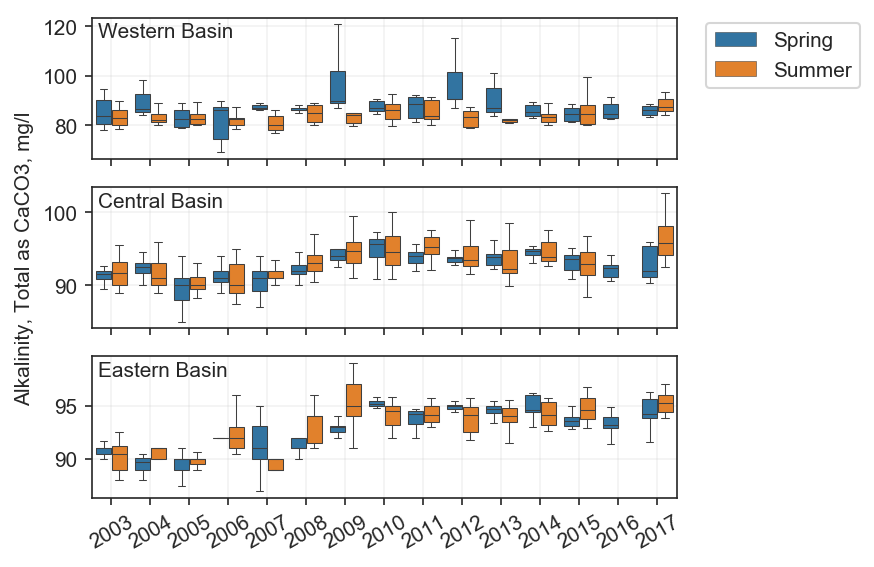

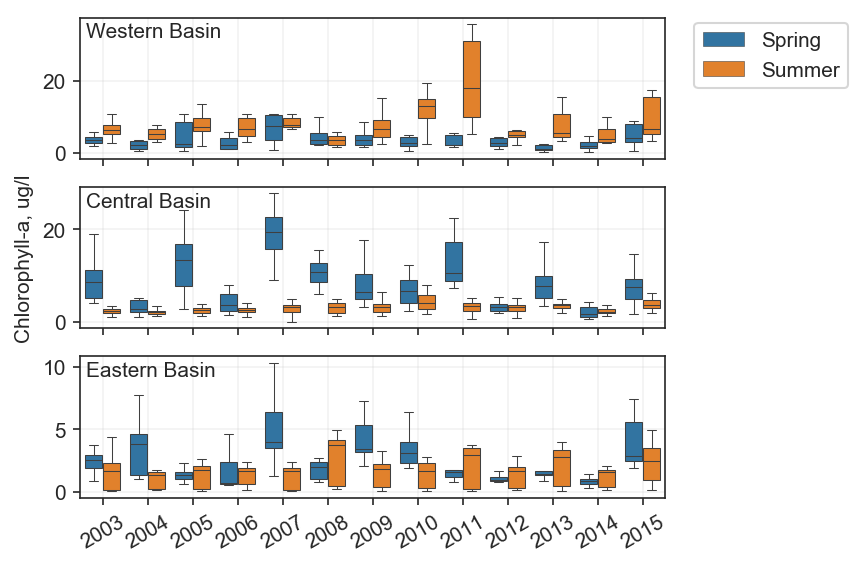

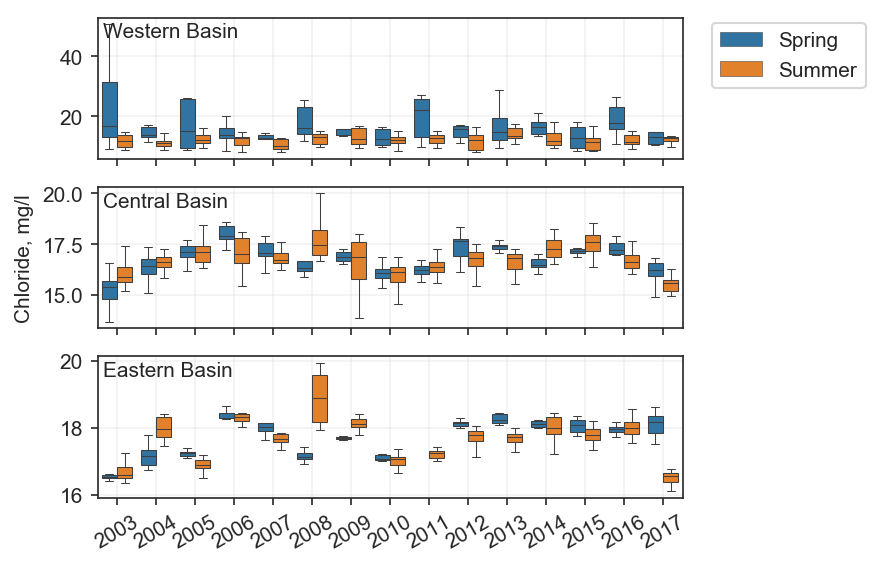

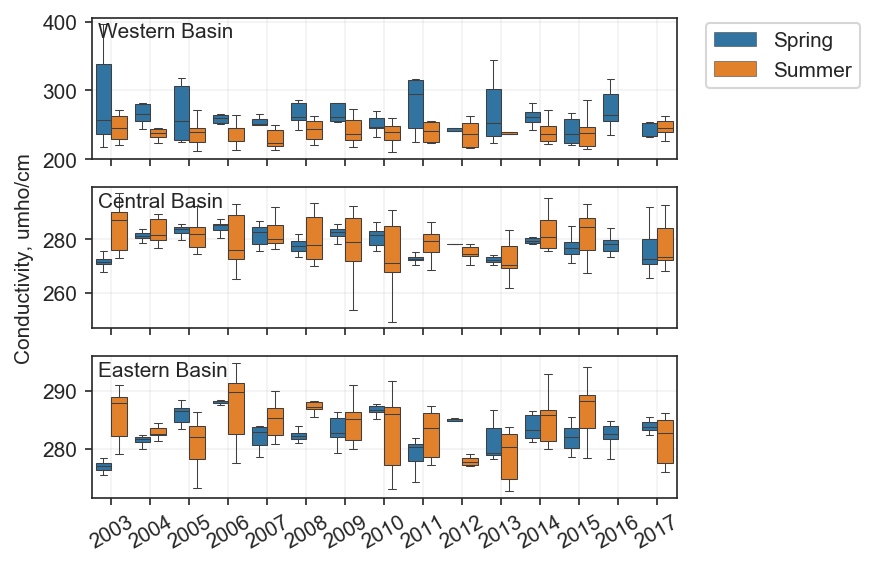

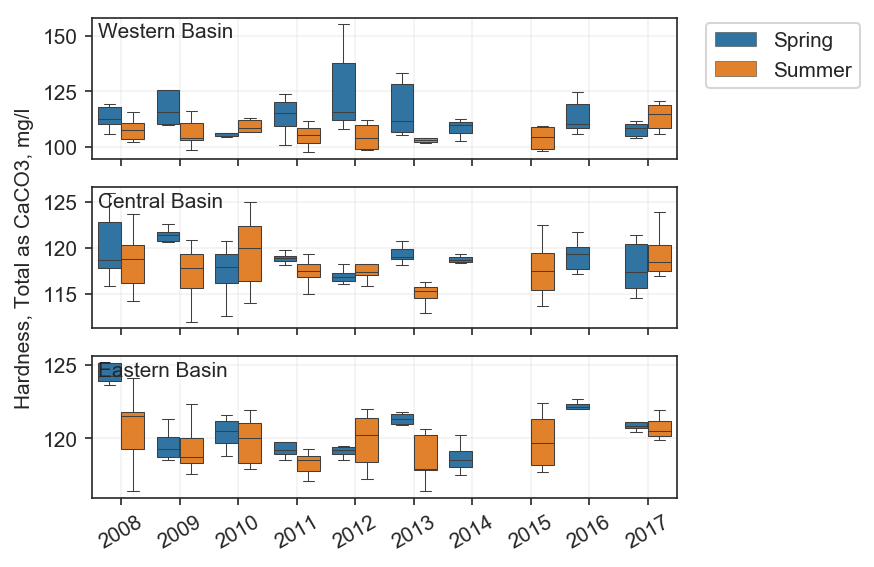

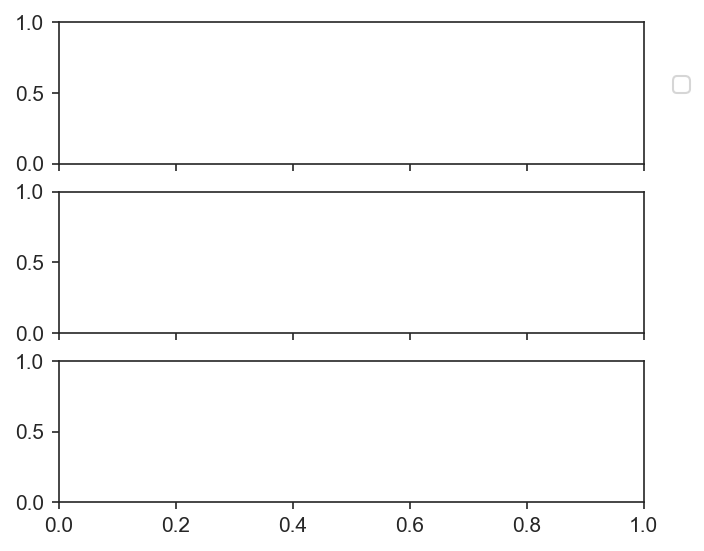

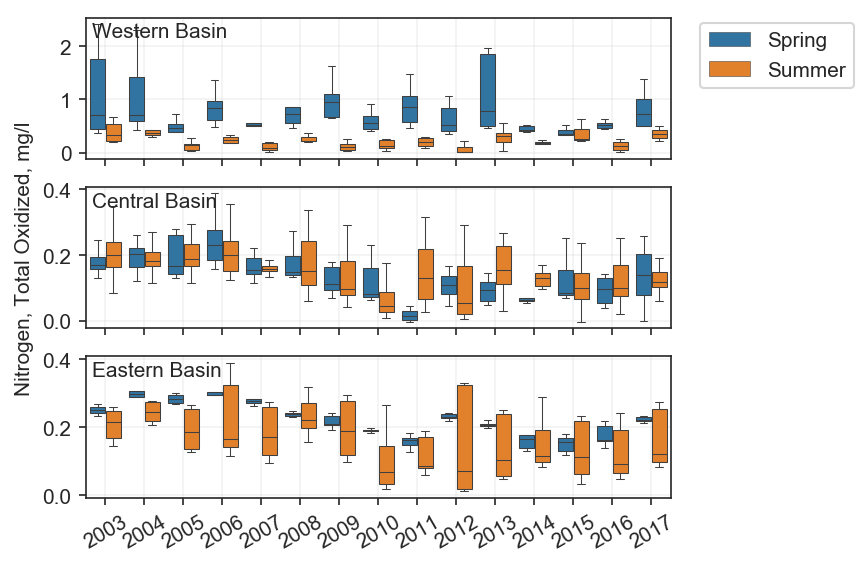

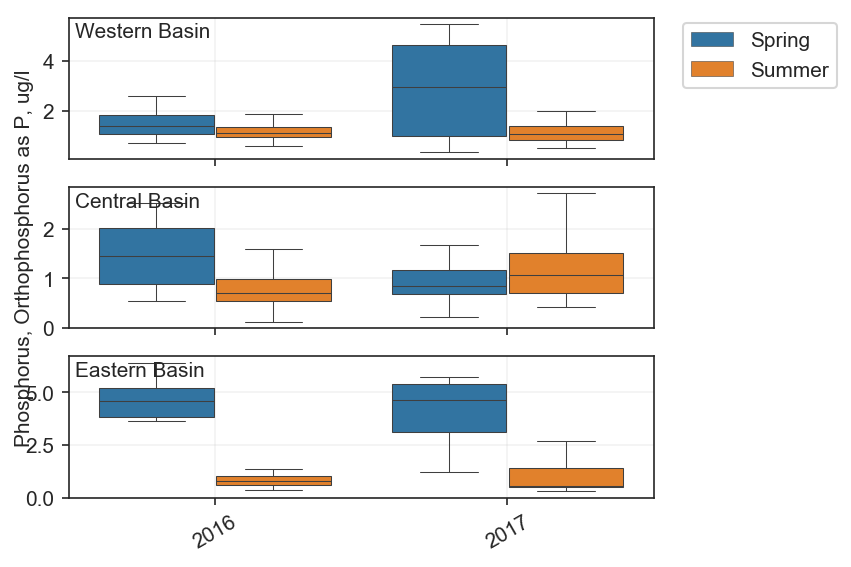

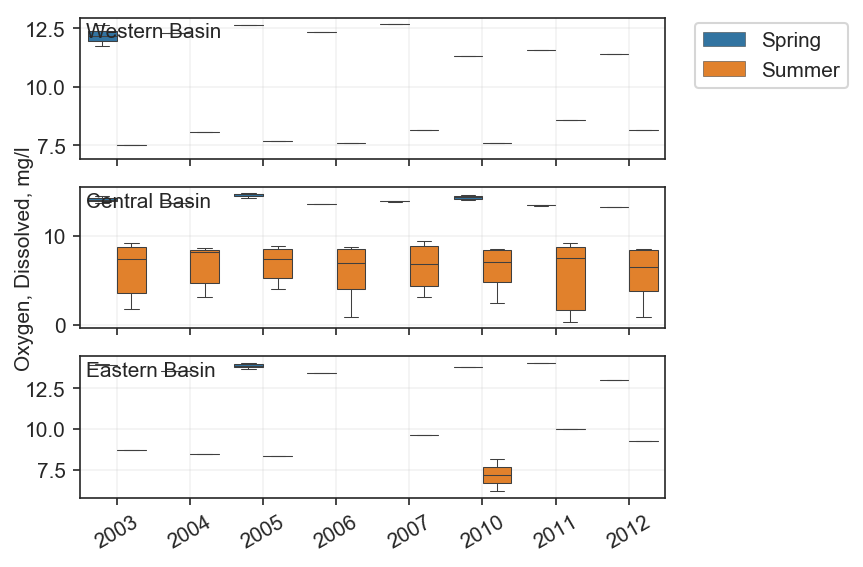

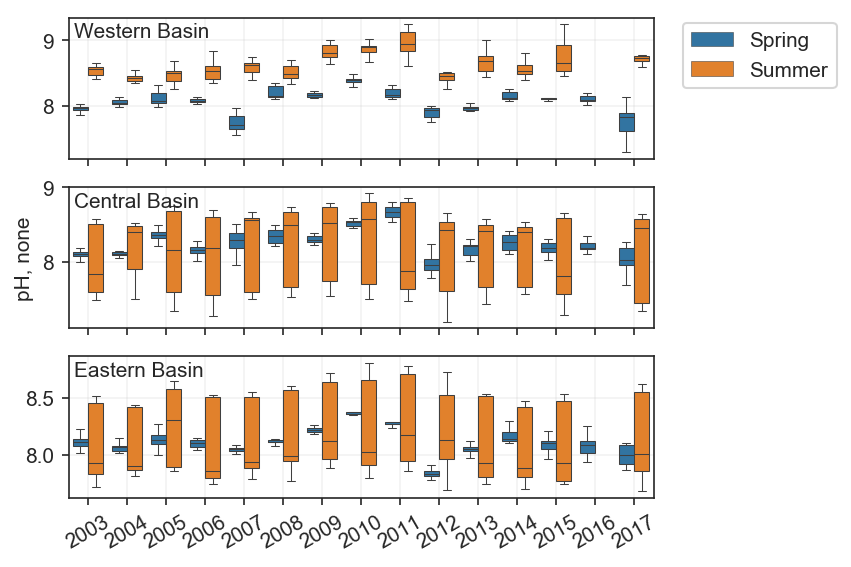

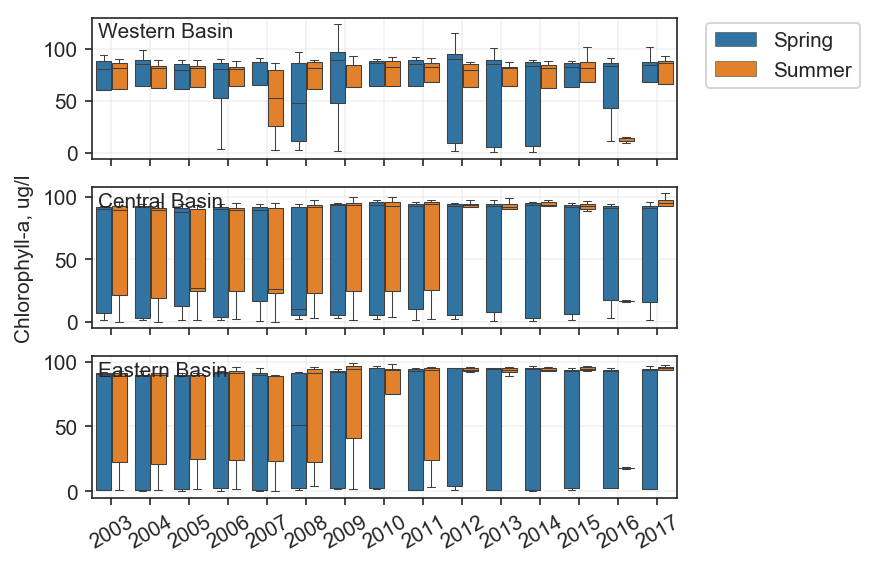

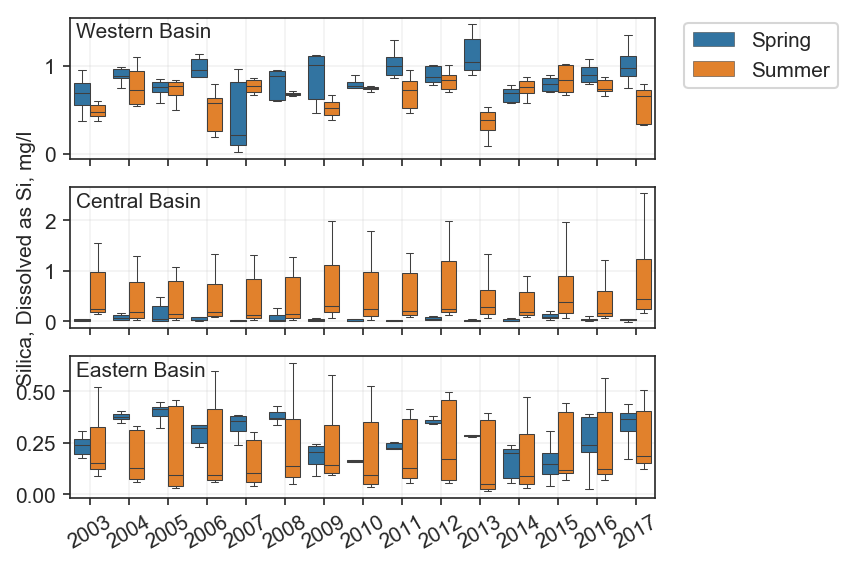

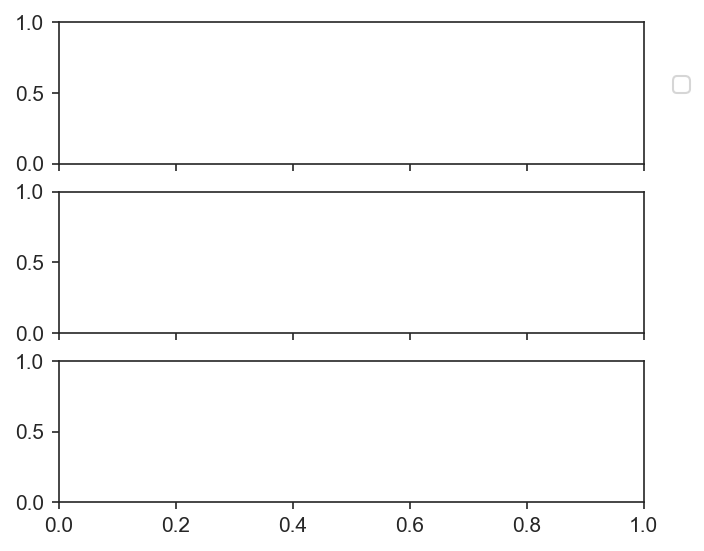

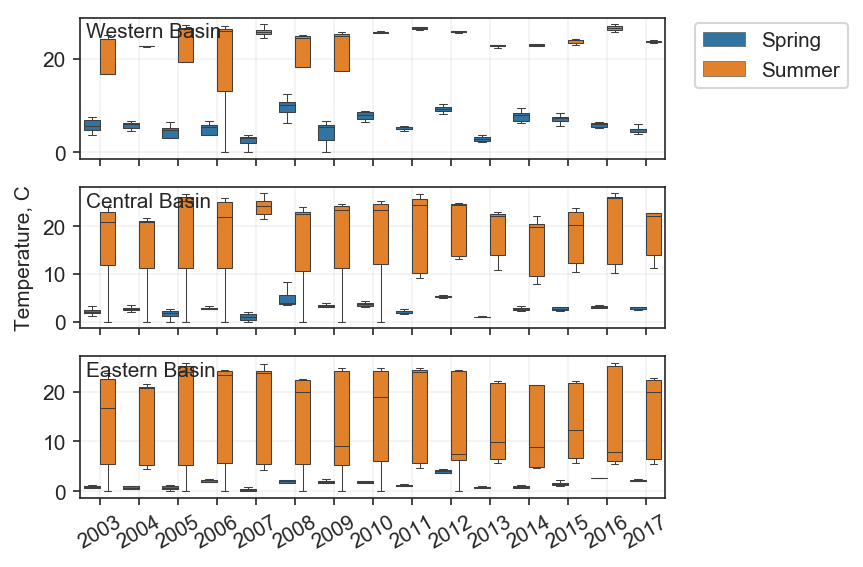

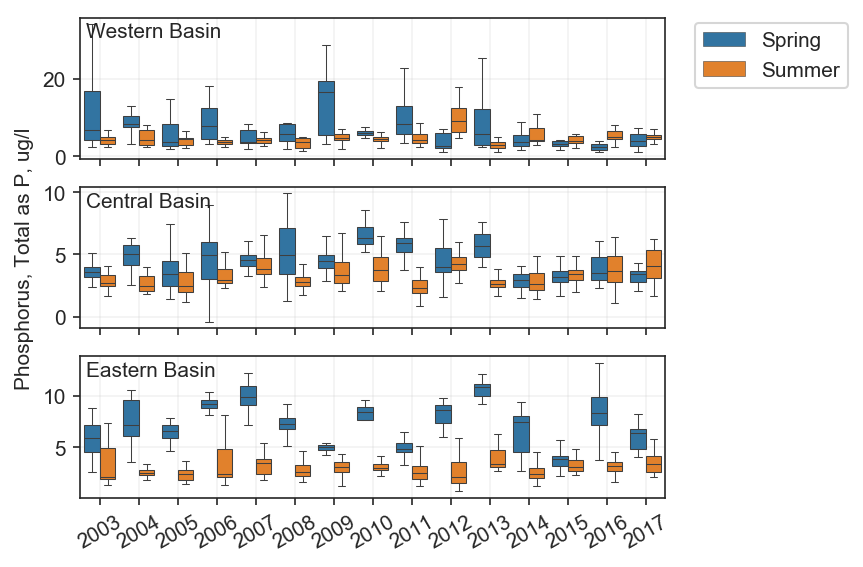

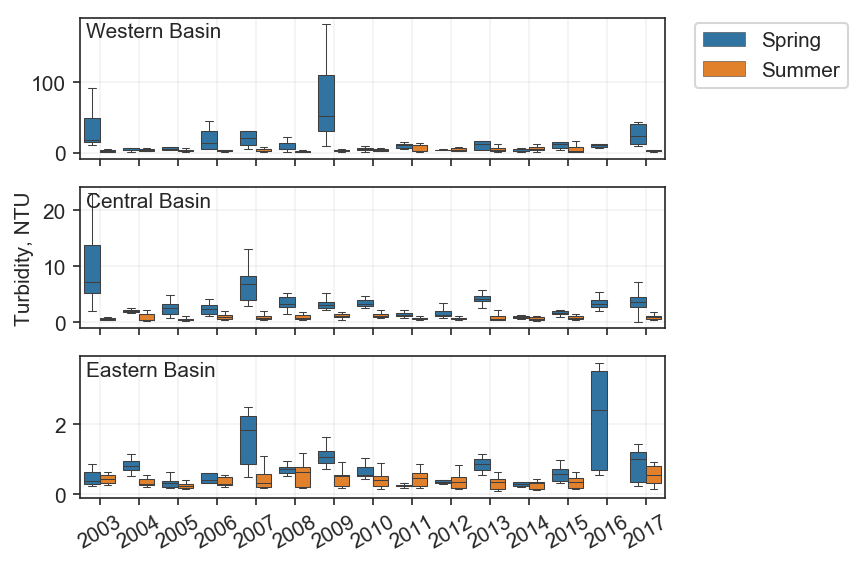

In [18]:
for name in names:
    elem = pd.read_csv('../../measurements/GLNPO/Mass Balance/'+name+'.csv')
    elem = elem[elem.QC_TYPE=='routine field sample']
    elem = elem[elem['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
    elem = elem[elem['SEASON'].isin(seasons)]
    elem = elem[elem['YEAR'].isin(years)]
    elem['VALUE_1'] = pd.to_numeric(elem['VALUE_1'], errors='coerce')
    elem['BASIN'] =elem['STATION_ID'].map(basin)
    if name=='Cl':
        elem = elem[elem['VALUE_1']>8]
    f, axes = plt.subplots(3,1, figsize=(6,4), dpi=150, sharex=True)
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
    #     for k, s in enumerate(seasons):
            data = elem[(elem['STATION_ID'].isin(b))]
    #         data = data.groupby(['YEAR','SEASON']).mean().reset_index()
    #         if s=='Spring':
    #             elemr=sns.color_palette().as_hex()[0]
    #         if s=='Summer':
    #             elemr=sns.color_palette().as_hex()[2]
            try:
                ax = sns.boxplot(x='YEAR', y='VALUE_1', data=data,hue='SEASON', ax=axes[i],  showfliers=False, linewidth=0.5)
    #             sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
                ax.legend_.remove()
                ax.set_label(elem.ANALYTE_1.values[0])
    #             axes[i].set_xlim(17.5,32.5)
                axes[i].set_ylim(auto=True)
                axes[i].grid(lw=0.2)
                axes[i].set_xlabel('')
                axes[i].set_ylabel('')
        #         axes[i].legend(False)
                axes[i].text(0.01,0.86, data.BASIN.values[0], fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
                axes[1].set_ylabel(elem.ANALYTE_1.values[0]+', ' + elem.UNITS_1.values[0])
            except:
                pass
    # axes[0].set_ylim(0,30)
    # axes[1].set_ylim(13,21)
    # axes[2].set_ylim(15,21)
    axes[0].legend(loc=(1.05,0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.subplots_adjust(left=0.1, right=0.75, bottom=0.1, top=0.9)
    try:
        f.savefig('Mass Balance/GLENDA/All Stations/2012-2015/Glenda Trends/'+elem.ANALYTE_1.values[0]+'_' + elem.UNITS_1.values[0].replace('/', '')+'.pdf')
    except:
        print(name)


NH3N
SiTotal


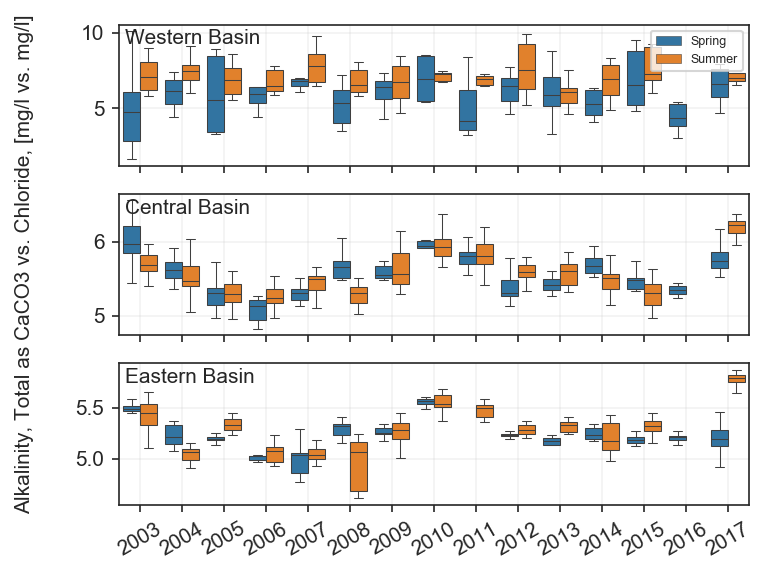

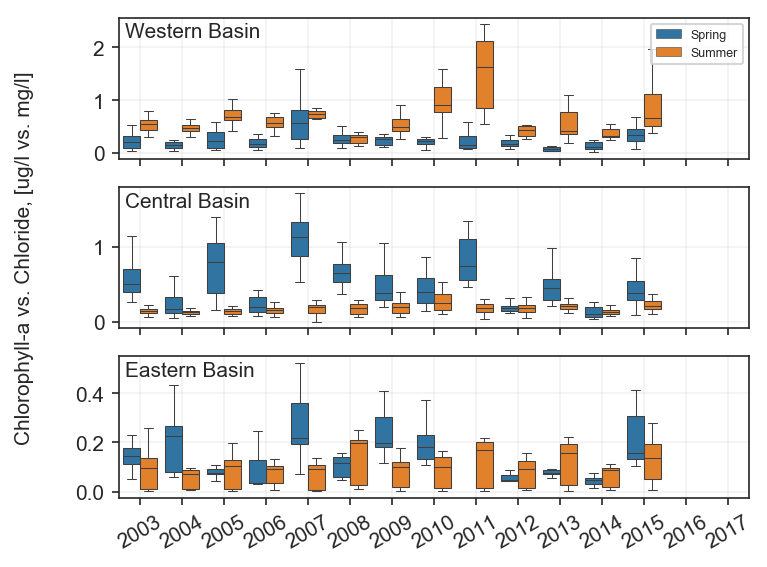

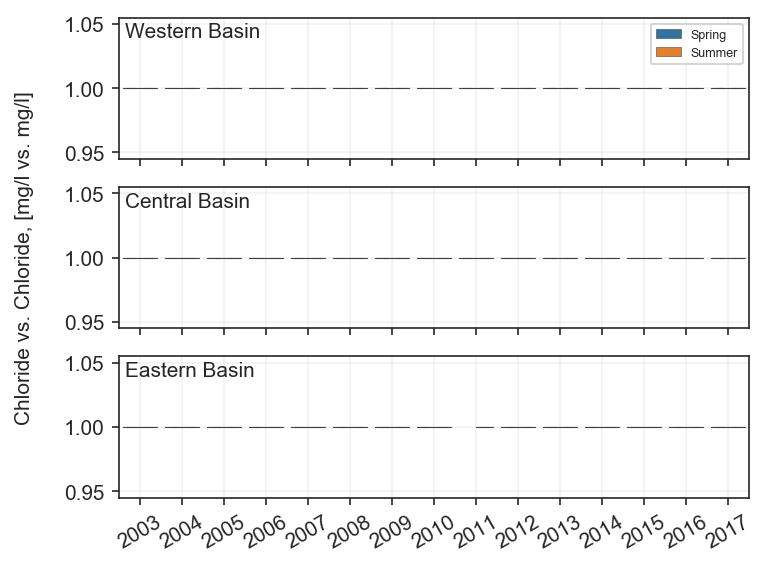

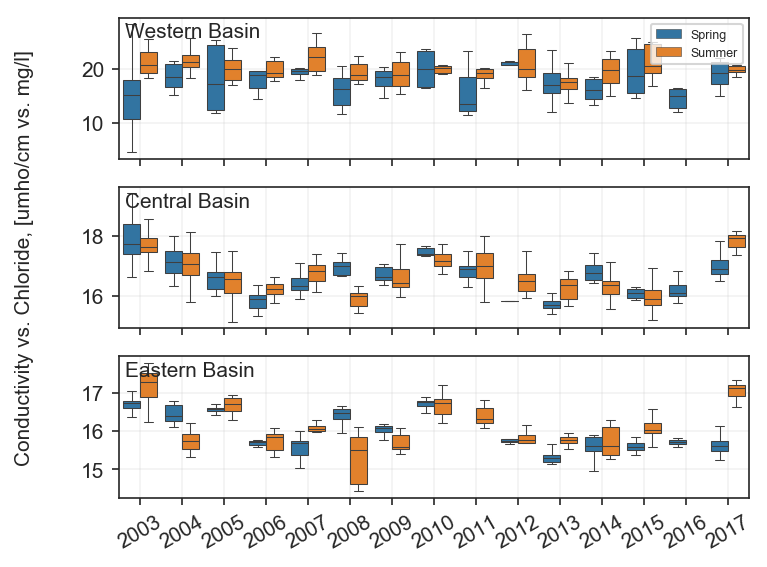

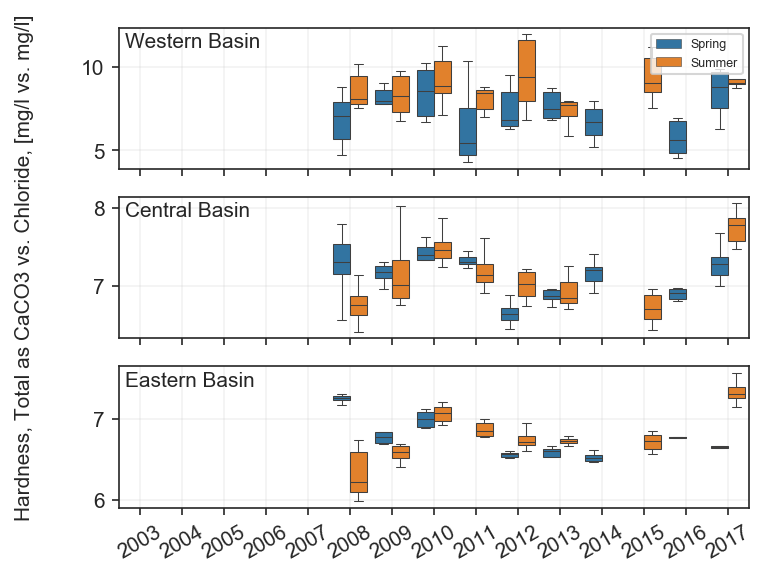

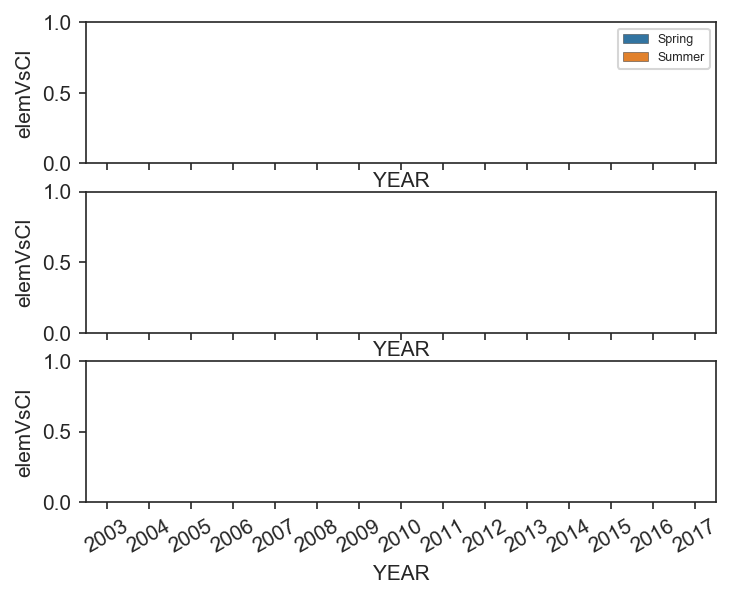

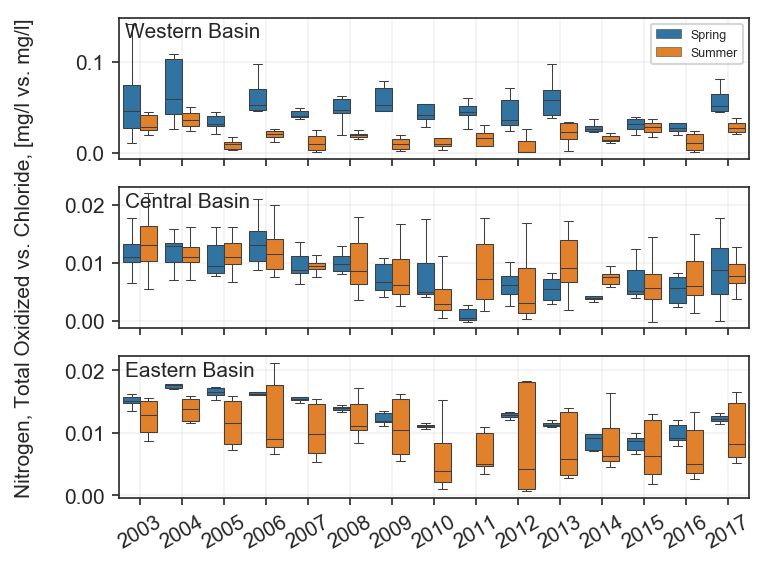

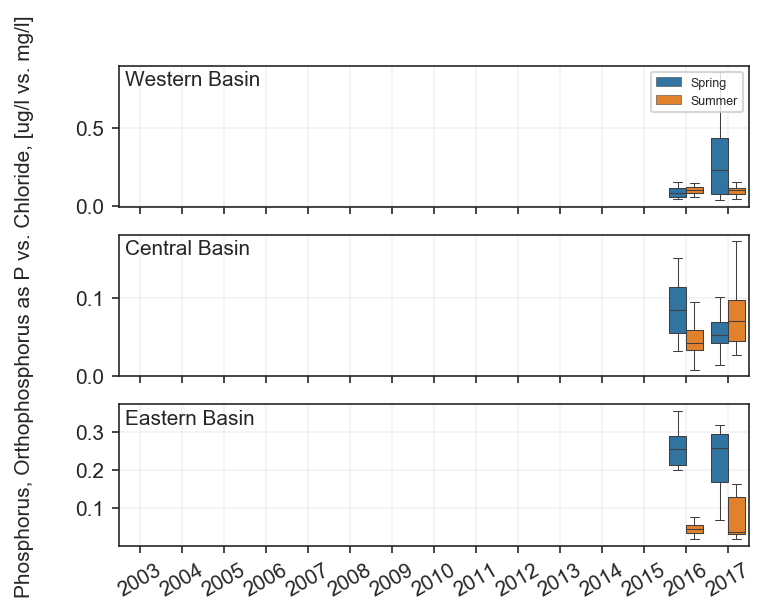

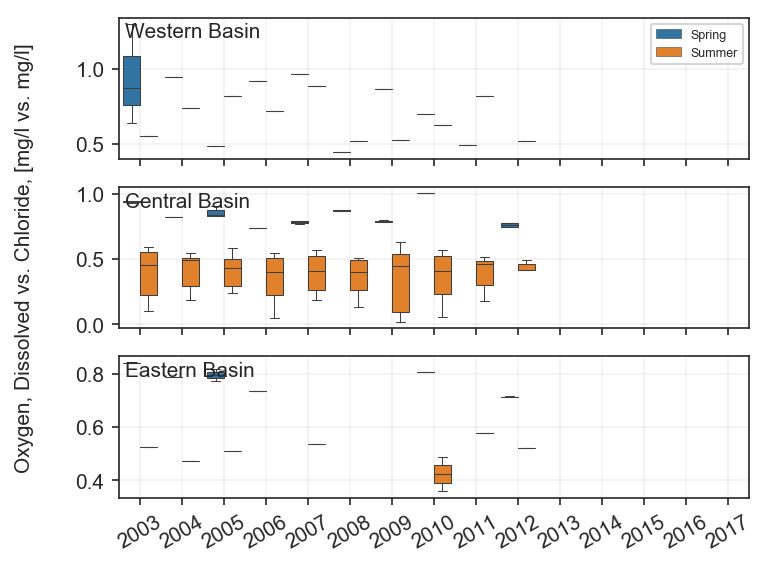

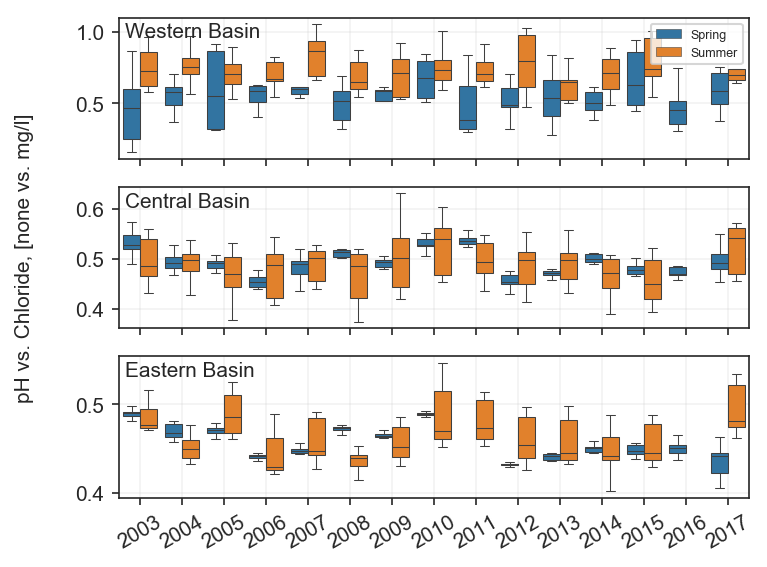

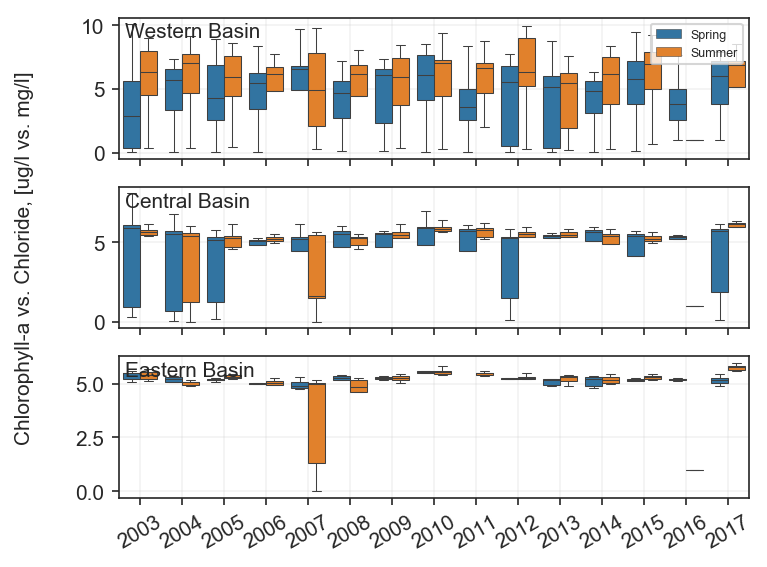

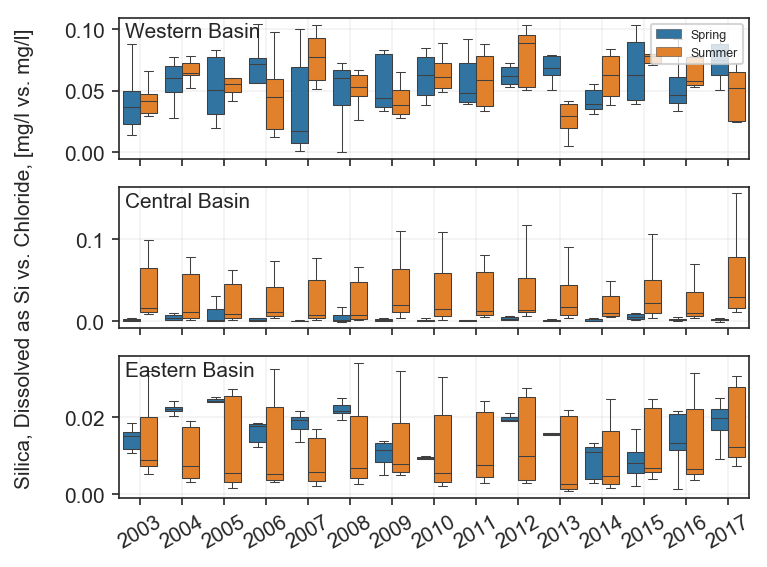

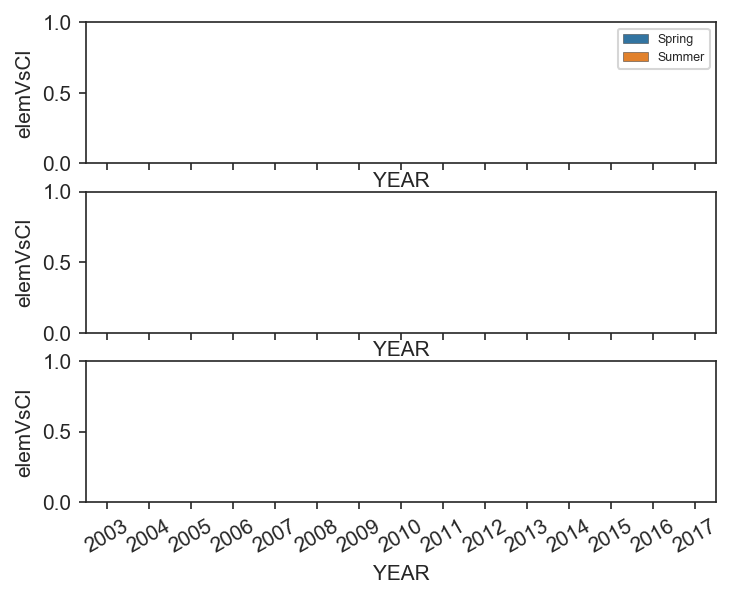

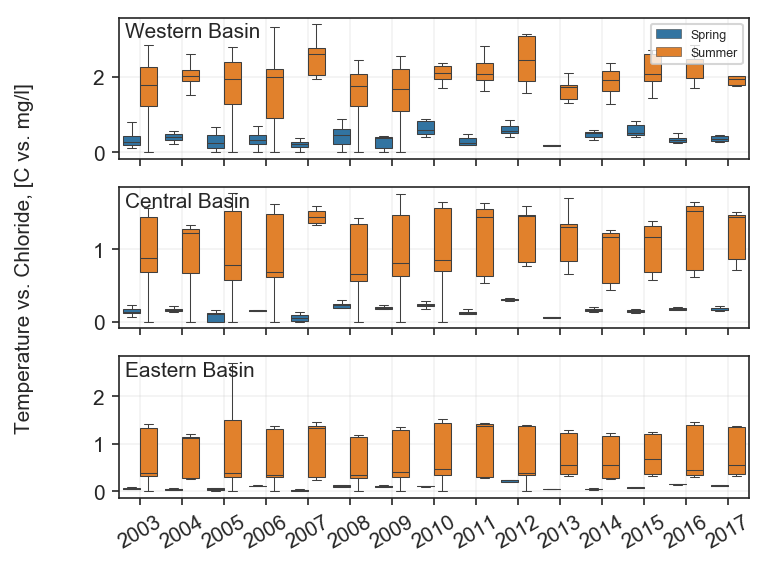

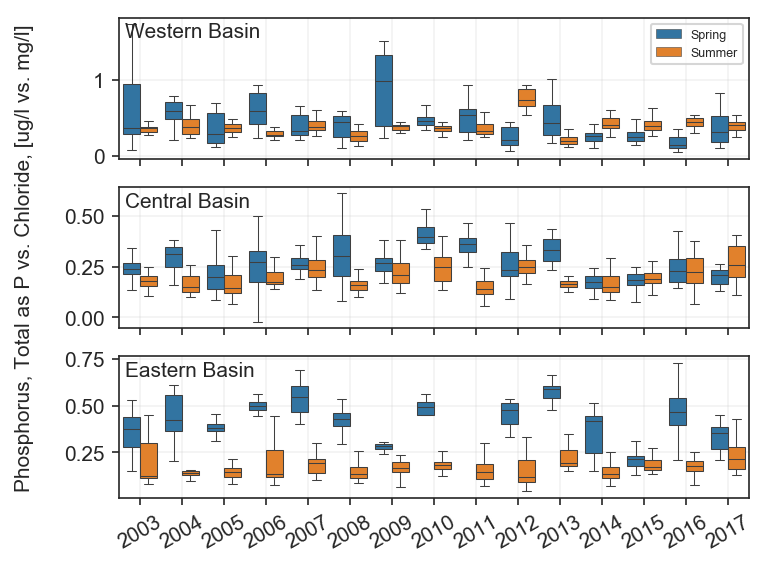

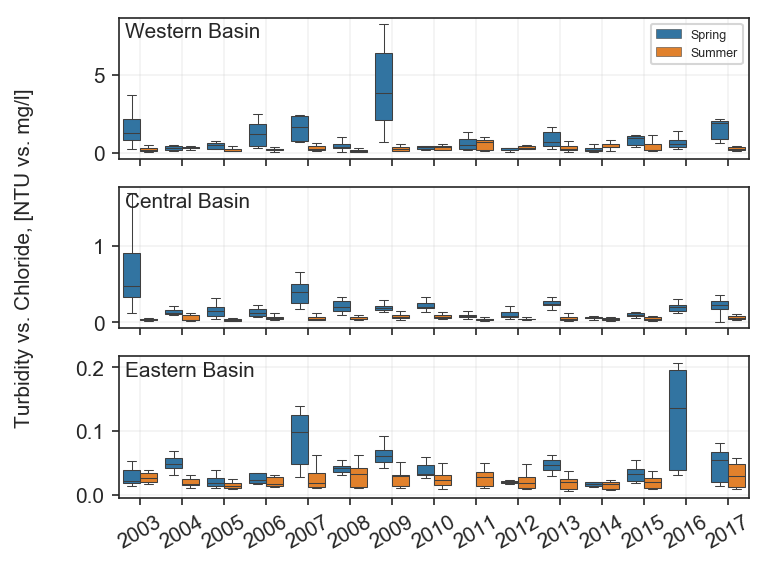

In [45]:
for name in names:
    elem = pd.read_csv('../../measurements/GLNPO/Mass Balance/'+name+'.csv')
    elem = elem[elem.QC_TYPE=='routine field sample']
    elem = elem[elem['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
    elem = elem[elem['SEASON'].isin(seasons)]
    elem = elem[elem['YEAR'].isin(years)]
    elem['VALUE_1'] = pd.to_numeric(elem['VALUE_1'], errors='coerce')
    elem['elem_conc'] = elem['VALUE_1']
    elem['BASIN'] =elem['STATION_ID'].map(basin)
    if name=='Cl':
        elem = elem[elem['VALUE_1']>8]
    Ratios = pd.merge(Cl, elem, how='left', on=['SAMPLE_DEPTH_M', 'STATION_ID', 'SEASON', 'YEAR', 'SAMPLE_DEPTH_M'])
    Ratios['elemVsCl'] = Ratios['elem_conc']/Ratios['Cl_conc']
    f, axes = plt.subplots(3,1, figsize=(6,4), dpi=150, sharex=True)
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
    #     for k, s in enumerate(seasons):
            data = Ratios[(Ratios['STATION_ID'].isin(b))]
    #         data = data.groupby(['YEAR','SEASON']).mean().reset_index()
    #         if s=='Spring':
    #             elemr=sns.color_palette().as_hex()[0]
    #         if s=='Summer':
    #             elemr=sns.color_palette().as_hex()[2]
            try:
                ax = sns.boxplot(x='YEAR', y='elemVsCl', data=data,hue='SEASON', ax=axes[i],  showfliers=False, linewidth=0.5)
    #             sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
                ax.legend_.remove()
                ax.set_label(elem.ANALYTE_1.values[0])
    #             axes[i].set_xlim(17.5,32.5)
                axes[i].set_ylim(auto=True)
                axes[i].grid(lw=0.2)
                axes[i].set_xlabel('')
                axes[i].set_ylabel('')
        #         axes[i].legend(False)
                axes[i].text(0.01,0.86, data.BASIN_x.values[0], fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
            except:
                pass
    # axes[0].set_ylim(0,30)
    # axes[1].set_ylim(13,21)
    # axes[2].set_ylim(15,21)
    axes[0].legend(loc=1, prop={'size': 6})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.subplots_adjust(left=0.15, right=0.85, bottom=0.1, top=0.9)
    try:
        axes[1].text(-0.15,0.5, elem.ANALYTE_1.values[0]+' vs. Chloride, ' + '['+ elem.UNITS_1.values[0] + ' vs. mg/l]', rotation=90, fontsize=10, verticalalignment='center', horizontalalignment='center', transform=axes[1].transAxes)
        f.savefig('Mass Balance/GLENDA/All Stations/2012-2015/Glenda Trends Ratios/'+elem.ANALYTE_1.values[0]+'_vs. Chloride.pdf')
    except:
        print(name)


NH3N
SiTotal


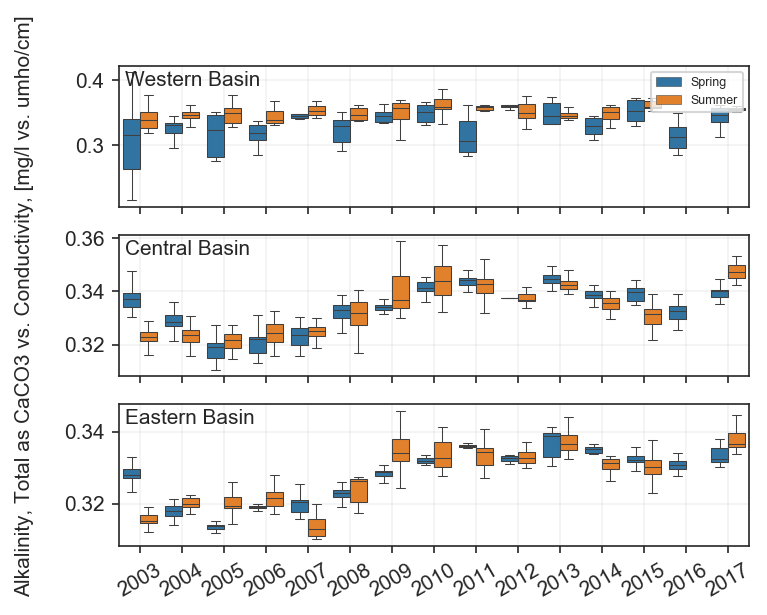

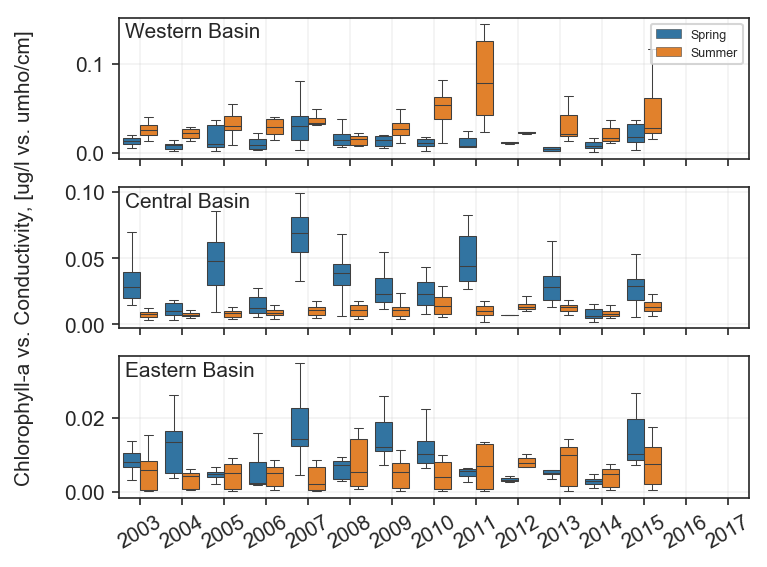

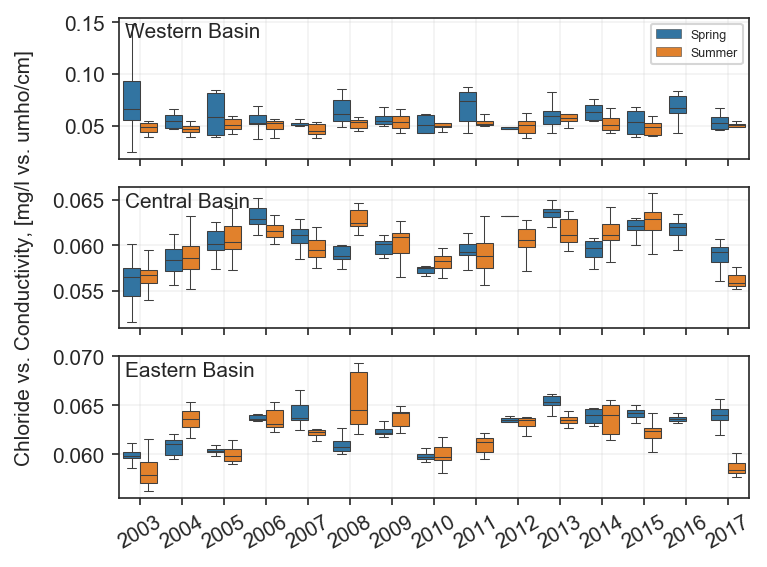

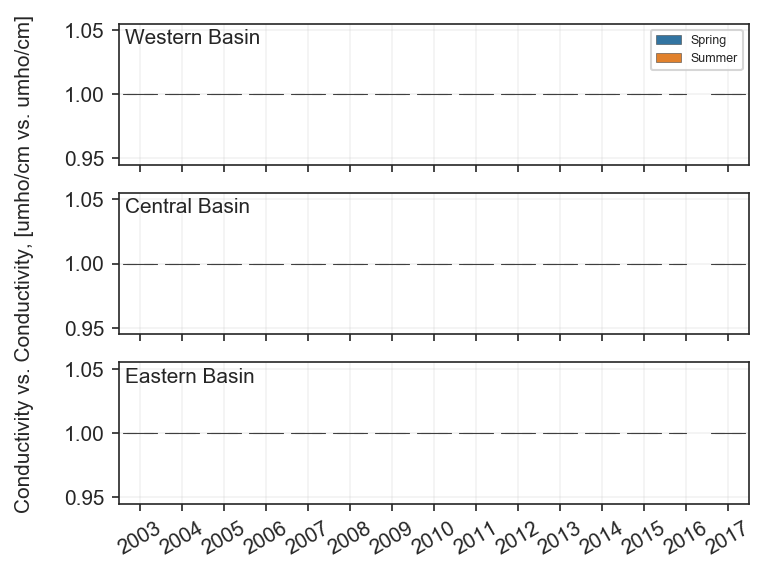

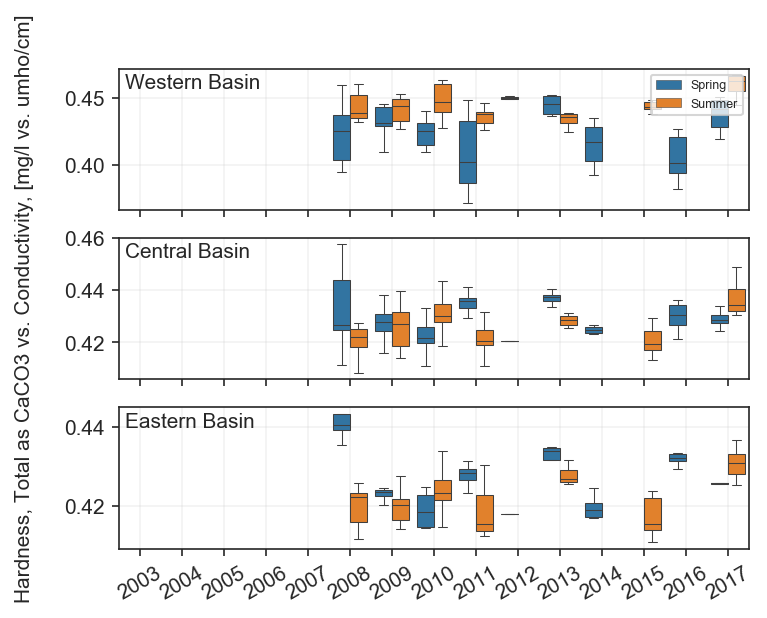

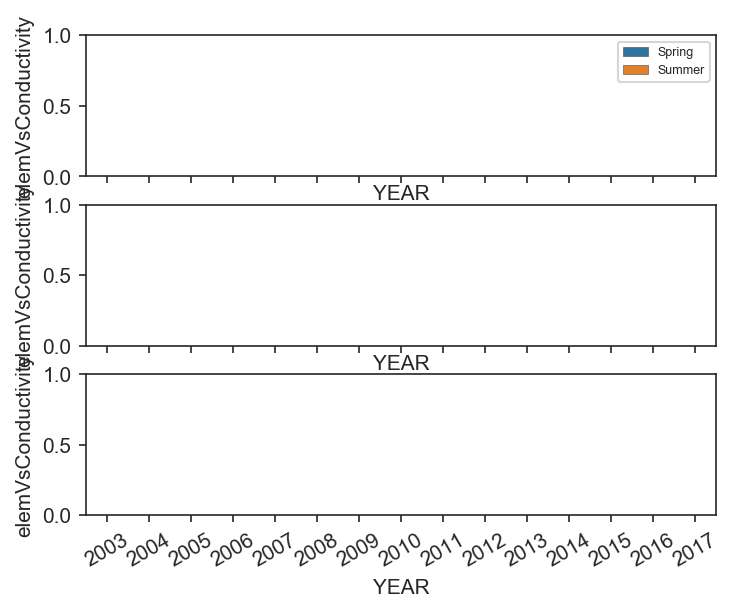

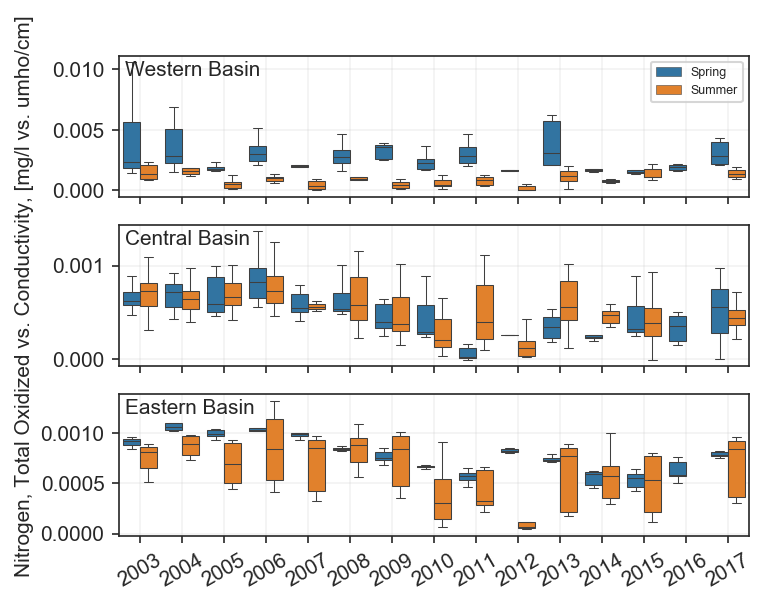

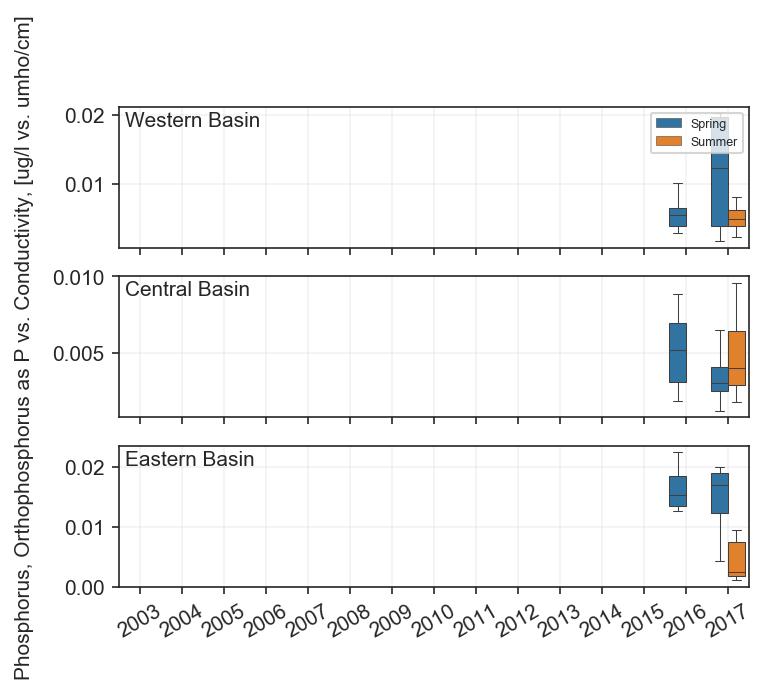

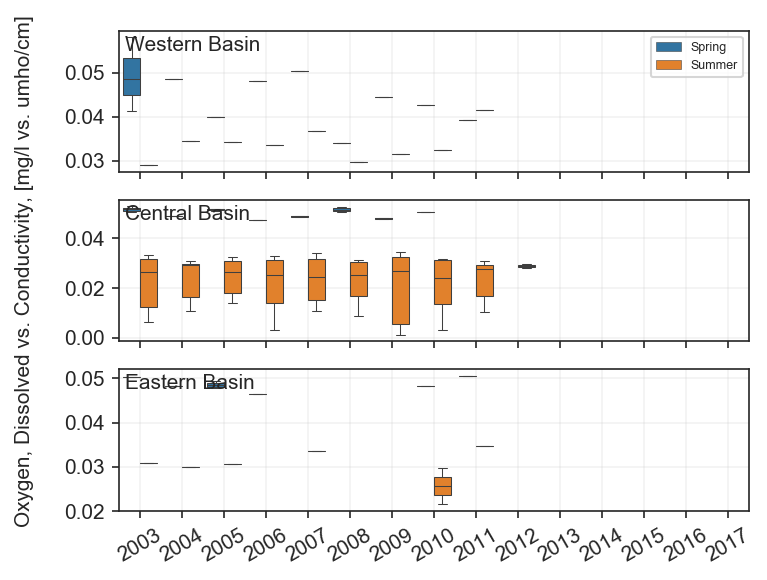

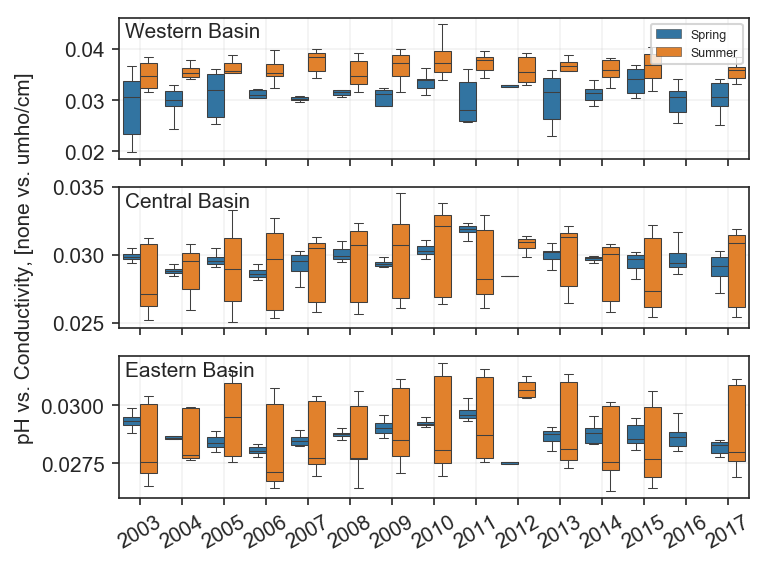

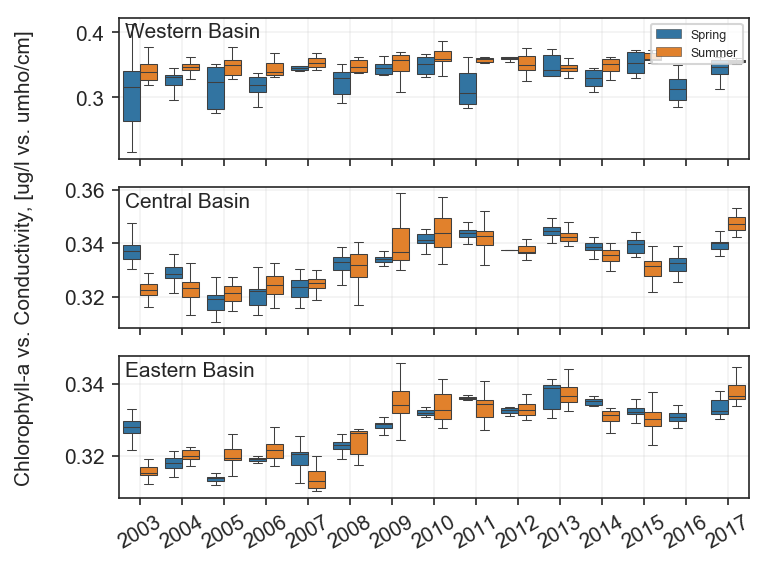

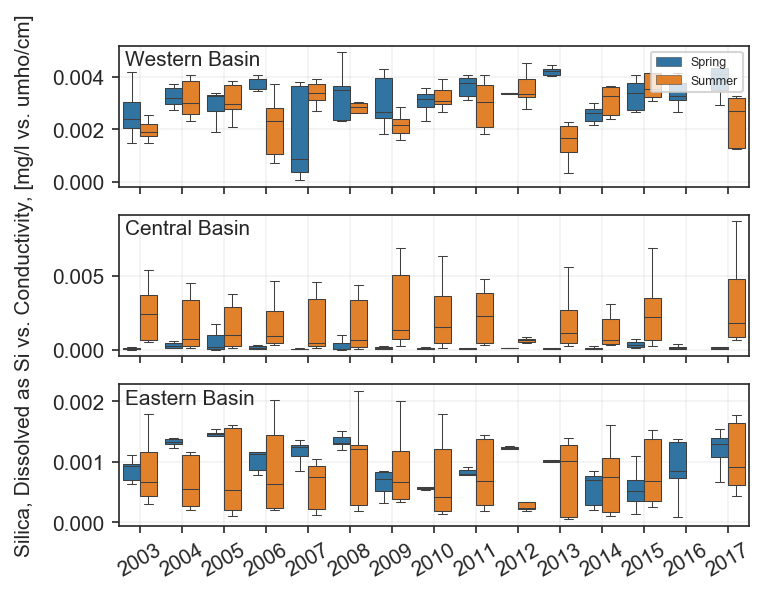

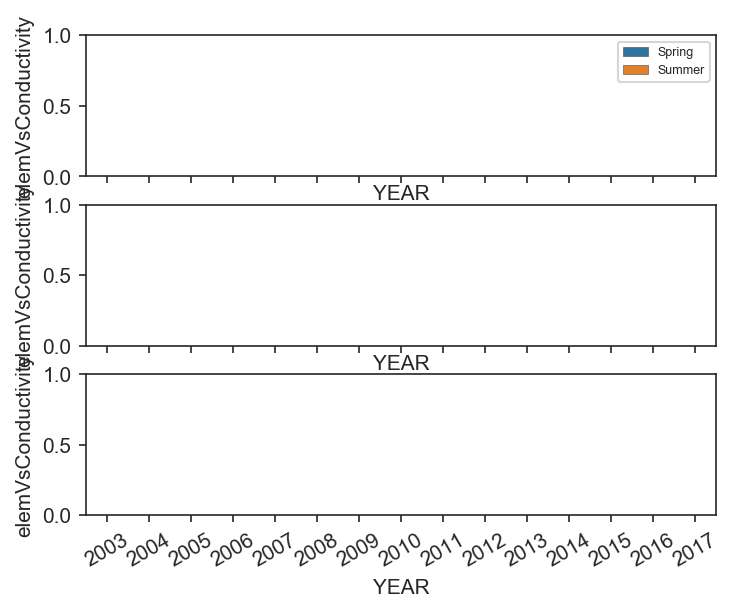

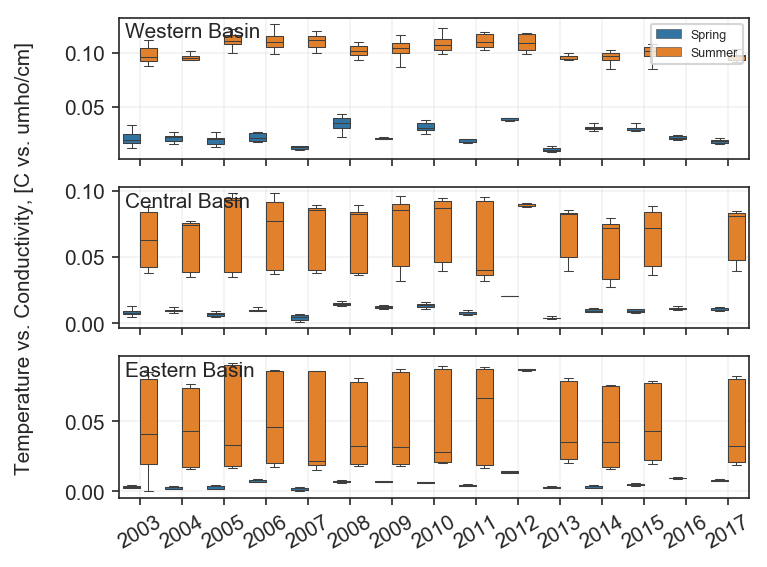

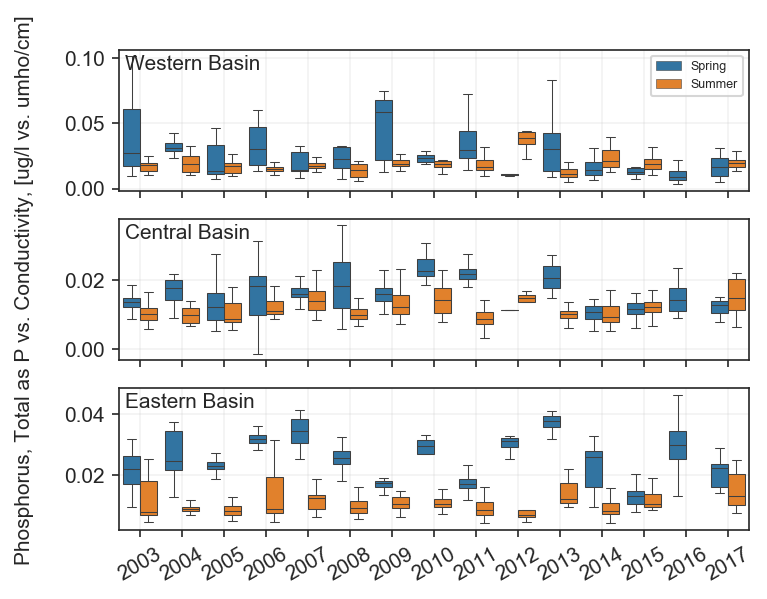

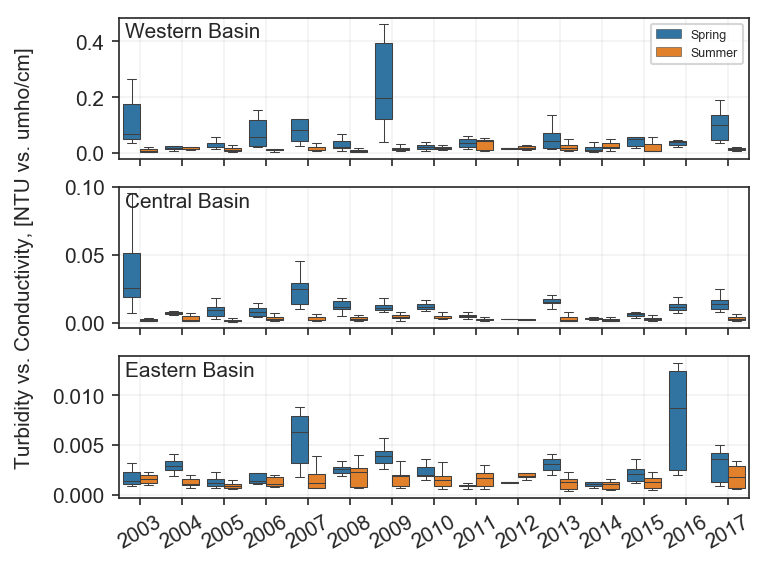

In [56]:
for name in names:
    elem = pd.read_csv('../../measurements/GLNPO/Mass Balance/'+name+'.csv')
    elem = elem[elem.QC_TYPE=='routine field sample']
    elem = elem[elem['STATION_ID'].isin(eastern_basin+central_basin+western_basin)]
    elem = elem[elem['SEASON'].isin(seasons)]
    elem = elem[elem['YEAR'].isin(years)]
    elem['VALUE_1'] = pd.to_numeric(elem['VALUE_1'], errors='coerce')
    elem['elem_conc'] = elem['VALUE_1']
    elem['BASIN'] =elem['STATION_ID'].map(basin)
    if name=='Cl':
        elem = elem[elem['VALUE_1']>8]
    Ratios = pd.merge(Conductivity, elem, how='left', on=['SAMPLE_DEPTH_M', 'STATION_ID', 'SEASON', 'YEAR', 'SAMPLE_DEPTH_M'])
    Ratios['elemVsConductivity'] = Ratios['elem_conc']/Ratios['Conductivity_conc']
    f, axes = plt.subplots(3,1, figsize=(6,4), dpi=150, sharex=True)
    for i, b in enumerate([western_basin, central_basin, eastern_basin]):
    #     for k, s in enumerate(seasons):
            data = Ratios[(Ratios['STATION_ID'].isin(b))]
    #         data = data.groupby(['YEAR','SEASON']).mean().reset_index()
    #         if s=='Spring':
    #             elemr=sns.color_palette().as_hex()[0]
    #         if s=='Summer':
    #             elemr=sns.color_palette().as_hex()[2]
            try:
                ax = sns.boxplot(x='YEAR', y='elemVsConductivity', data=data,hue='SEASON', ax=axes[i],  showfliers=False, linewidth=0.5)
    #             sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
                ax.legend_.remove()
                ax.set_label(elem.ANALYTE_1.values[0])
    #             axes[i].set_xlim(17.5,32.5)
                axes[i].set_ylim(auto=True)
                axes[i].grid(lw=0.2)
                axes[i].set_xlabel('')
                axes[i].set_ylabel('')
        #         axes[i].legend(False)
                axes[i].text(0.01,0.86, data.BASIN_x.values[0], fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
            except:
                pass
    # axes[0].set_ylim(0,30)
    # axes[1].set_ylim(13,21)
    # axes[2].set_ylim(15,21)
    axes[0].legend(loc=1, prop={'size': 6})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.subplots_adjust(left=0.15, right=0.85, bottom=0.1, top=0.9)
    try:
        axes[1].text(-0.15,0.5, elem.ANALYTE_1.values[0]+' vs. Conductivity, ' + '['+ elem.UNITS_1.values[0] + ' vs. umho/cm]', rotation=90, fontsize=10, verticalalignment='center', horizontalalignment='center', transform=axes[1].transAxes)
        f.savefig('Mass Balance/GLENDA/All Stations/2012-2015/Glenda Trends Ratios/'+elem.ANALYTE_1.values[0]+'_vs. Conductivity.pdf')
    except:
        print(name)
